In [1]:
import os
import plotters
import reader
from DataTransformer import DataTransformer

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths
print(os.getcwd())

/home/linus/Dokumente/Studium/Master/Amsterdam/02_DisSys/Project/CloudScheduling/plotter_4_cloud


In [2]:
data = reader.sort_dfs(["Random",])
transformer = DataTransformer(data)

# ECDF for makespan

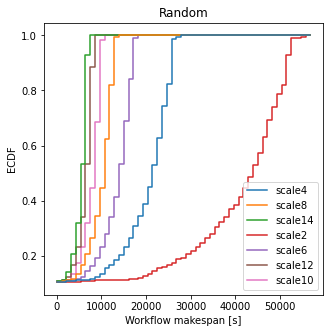

In [3]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_policy("askalon-ee2-parquet", "homogeneous", "exp_scale_ecdf.png")

plotters.create_makespan_cdf_order_policy(ecdf_data, ecdf_meta)

# Electricity

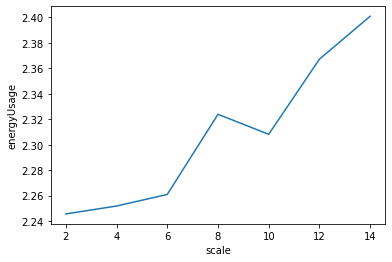

In [4]:
electricity_data, electricity_meta = transformer.to_electricity_scale("askalon-ee2-parquet", "homogeneous", "exp_scale_electricity.png")

plotters.create_energy_plot_scale(electricity_data, electricity_meta)

# Utilization

In [5]:
utilization_data, utilization_meta = transformer.to_utilization_table("askalon-ee2-parquet", "homogeneous", "exp_scale_utilization.png")

utilization_data

,2,4,6,8,10,12,14
policy,,,,,,,
Random,0.771684,0.74825,0.718505,0.643527,0.666932,0.576667,0.547024
